In [2]:
import matplotlib.pyplot as plt
import sys
sys.path.append('E:\\notebook\\mlpractical\\mlpractical-mlp2021-22-coursework1')

%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [3]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x000002A47C6D0828>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000002A47C6D0160>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.1s to complete
    error(train)=7.16e-01, acc(train)=7.71e-01, error(valid)=7.35e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.2s to complete
    error(train)=5.64e-01, acc(train)=8.16e-01, error(valid)=6.08e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.1s to complete
    error(train)=4.69e-01, acc(train)=8.40e-01, error(valid)=5.35e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.1s to complete
    error(train)=4.31e-01, acc(train)=8.46e-01, error(valid)=5.14e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 5.2s to complete
    error(train)=4.11e-01, acc(train)=8.56e-01, error(valid)=5.11e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.4s to complete
    error(train)=3.87e-01, acc(train)=8.62e-01, error(valid)=5.08e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.2s to complete
    error(train)=3.64e-01, acc(train)=8.68e-01, error(valid)=5.05e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.4s to complete
    error(train)=3.36e-01, acc(train)=8.78e-01, error(valid)=4.88e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.7s to complete
    error(train)=3.24e-01, acc(train)=8.80e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.7s to complete
    error(train)=3.19e-01, acc(train)=8.81e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.0s to complete
    error(train)=3.03e-01, acc(train)=8.85e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 5.9s to complete
    error(train)=2.93e-01, acc(train)=8.89e-01, error(valid)=5.13e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.5s to complete
    error(train)=2.75e-01, acc(train)=8.96e-01, error(valid)=5.09e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.6s to complete
    error(train)=2.68e-01, acc(train)=8.98e-01, error(valid)=5.13e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.4s to complete
    error(train)=2.52e-01, acc(train)=9.02e-01, error(valid)=5.18e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.5s to complete
    error(train)=2.48e-01, acc(train)=9.03e-01, error(valid)=5.41e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.4s to complete
    error(train)=2.41e-01, acc(train)=9.05e-01, error(valid)=5.52e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 5.4s to complete
    error(train)=2.29e-01, acc(train)=9.10e-01, error(valid)=5.48e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 5.4s to complete
    error(train)=2.30e-01, acc(train)=9.09e-01, error(valid)=5.72e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.4s to complete
    error(train)=2.26e-01, acc(train)=9.09e-01, error(valid)=5.76e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 5.4s to complete
    error(train)=2.19e-01, acc(train)=9.13e-01, error(valid)=5.90e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.0s to complete
    error(train)=2.29e-01, acc(train)=9.07e-01, error(valid)=6.21e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.5s to complete
    error(train)=2.24e-01, acc(train)=9.10e-01, error(valid)=6.36e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 5.4s to complete
    error(train)=2.09e-01, acc(train)=9.15e-01, error(valid)=6.47e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.6s to complete
    error(train)=2.01e-01, acc(train)=9.18e-01, error(valid)=6.46e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.8s to complete
    error(train)=1.90e-01, acc(train)=9.22e-01, error(valid)=6.58e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.9s to complete
    error(train)=2.02e-01, acc(train)=9.18e-01, error(valid)=6.95e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.8s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=6.64e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 5.7s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=6.98e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 5.8s to complete
    error(train)=1.85e-01, acc(train)=9.24e-01, error(valid)=7.16e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 5.9s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=7.61e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 5.8s to complete
    error(train)=1.75e-01, acc(train)=9.28e-01, error(valid)=7.20e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.8s to complete
    error(train)=1.72e-01, acc(train)=9.30e-01, error(valid)=7.58e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.7s to complete
    error(train)=1.66e-01, acc(train)=9.32e-01, error(valid)=7.47e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 5.9s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=7.83e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.8s to complete
    error(train)=1.67e-01, acc(train)=9.30e-01, error(valid)=7.99e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.8s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=8.23e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 6.0s to complete
    error(train)=1.58e-01, acc(train)=9.34e-01, error(valid)=8.25e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.8s to complete
    error(train)=1.55e-01, acc(train)=9.36e-01, error(valid)=8.44e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.6s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=8.50e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 5.9s to complete
    error(train)=1.64e-01, acc(train)=9.32e-01, error(valid)=8.67e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.5s to complete
    error(train)=1.51e-01, acc(train)=9.38e-01, error(valid)=8.84e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.8s to complete
    error(train)=1.56e-01, acc(train)=9.37e-01, error(valid)=9.13e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.5s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=9.16e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.4s to complete
    error(train)=1.43e-01, acc(train)=9.42e-01, error(valid)=9.16e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.8s to complete
    error(train)=1.44e-01, acc(train)=9.39e-01, error(valid)=9.37e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.5s to complete
    error(train)=1.55e-01, acc(train)=9.34e-01, error(valid)=9.51e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.7s to complete
    error(train)=1.37e-01, acc(train)=9.43e-01, error(valid)=9.63e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.4s to complete
    error(train)=1.39e-01, acc(train)=9.42e-01, error(valid)=9.98e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.4s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=1.01e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 7.0s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=1.00e+00, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.2s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=1.00e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 6.2s to complete
    error(train)=1.38e-01, acc(train)=9.43e-01, error(valid)=1.03e+00, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.2s to complete
    error(train)=1.18e-01, acc(train)=9.51e-01, error(valid)=1.04e+00, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.3s to complete
    error(train)=1.36e-01, acc(train)=9.45e-01, error(valid)=1.06e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.4s to complete
    error(train)=1.50e-01, acc(train)=9.40e-01, error(valid)=1.10e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.2s to complete
    error(train)=1.30e-01, acc(train)=9.46e-01, error(valid)=1.08e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.2s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=1.13e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 6.2s to complete
    error(train)=1.24e-01, acc(train)=9.50e-01, error(valid)=1.09e+00, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.5s to complete
    error(train)=1.23e-01, acc(train)=9.49e-01, error(valid)=1.14e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.5s to complete
    error(train)=1.34e-01, acc(train)=9.46e-01, error(valid)=1.15e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.4s to complete
    error(train)=1.38e-01, acc(train)=9.45e-01, error(valid)=1.19e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 5.3s to complete
    error(train)=1.24e-01, acc(train)=9.48e-01, error(valid)=1.14e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.1s to complete
    error(train)=1.19e-01, acc(train)=9.51e-01, error(valid)=1.15e+00, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.8s to complete
    error(train)=1.25e-01, acc(train)=9.49e-01, error(valid)=1.22e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.4s to complete
    error(train)=1.34e-01, acc(train)=9.46e-01, error(valid)=1.23e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.2s to complete
    error(train)=1.21e-01, acc(train)=9.51e-01, error(valid)=1.21e+00, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 5.5s to complete
    error(train)=1.24e-01, acc(train)=9.49e-01, error(valid)=1.22e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.2s to complete
    error(train)=1.28e-01, acc(train)=9.49e-01, error(valid)=1.28e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.2s to complete
    error(train)=1.16e-01, acc(train)=9.53e-01, error(valid)=1.25e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 5.1s to complete
    error(train)=1.23e-01, acc(train)=9.52e-01, error(valid)=1.30e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 5.3s to complete
    error(train)=1.17e-01, acc(train)=9.53e-01, error(valid)=1.28e+00, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 5.2s to complete
    error(train)=1.32e-01, acc(train)=9.49e-01, error(valid)=1.30e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 5.2s to complete
    error(train)=1.14e-01, acc(train)=9.54e-01, error(valid)=1.32e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 5.2s to complete
    error(train)=1.23e-01, acc(train)=9.52e-01, error(valid)=1.34e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 5.3s to complete
    error(train)=1.24e-01, acc(train)=9.51e-01, error(valid)=1.36e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.3s to complete
    error(train)=1.16e-01, acc(train)=9.54e-01, error(valid)=1.38e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.8s to complete
    error(train)=1.12e-01, acc(train)=9.56e-01, error(valid)=1.35e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.8s to complete
    error(train)=1.13e-01, acc(train)=9.54e-01, error(valid)=1.39e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.8s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.39e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.8s to complete
    error(train)=1.29e-01, acc(train)=9.50e-01, error(valid)=1.39e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.9s to complete
    error(train)=1.29e-01, acc(train)=9.51e-01, error(valid)=1.44e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.0s to complete
    error(train)=1.24e-01, acc(train)=9.52e-01, error(valid)=1.45e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.9s to complete
    error(train)=1.25e-01, acc(train)=9.52e-01, error(valid)=1.44e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.9s to complete
    error(train)=1.17e-01, acc(train)=9.53e-01, error(valid)=1.44e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.9s to complete
    error(train)=1.37e-01, acc(train)=9.48e-01, error(valid)=1.51e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.0s to complete
    error(train)=1.18e-01, acc(train)=9.53e-01, error(valid)=1.46e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 5.0s to complete
    error(train)=1.23e-01, acc(train)=9.51e-01, error(valid)=1.51e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 5.0s to complete
    error(train)=1.15e-01, acc(train)=9.56e-01, error(valid)=1.54e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.0s to complete
    error(train)=1.15e-01, acc(train)=9.56e-01, error(valid)=1.56e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 5.0s to complete
    error(train)=1.12e-01, acc(train)=9.55e-01, error(valid)=1.53e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 5.0s to complete
    error(train)=1.06e-01, acc(train)=9.58e-01, error(valid)=1.57e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.9s to complete
    error(train)=1.31e-01, acc(train)=9.50e-01, error(valid)=1.57e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.3s to complete
    error(train)=1.21e-01, acc(train)=9.53e-01, error(valid)=1.64e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 5.2s to complete
    error(train)=1.15e-01, acc(train)=9.56e-01, error(valid)=1.61e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 5.2s to complete
    error(train)=1.16e-01, acc(train)=9.56e-01, error(valid)=1.67e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 5.4s to complete
    error(train)=1.13e-01, acc(train)=9.56e-01, error(valid)=1.65e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.3s to complete
    error(train)=1.06e-01, acc(train)=9.59e-01, error(valid)=1.62e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.4s to complete
    error(train)=1.10e-01, acc(train)=9.58e-01, error(valid)=1.68e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.9s to complete
    error(train)=1.15e-01, acc(train)=9.56e-01, error(valid)=1.67e+00, acc(valid)=8.23e-01


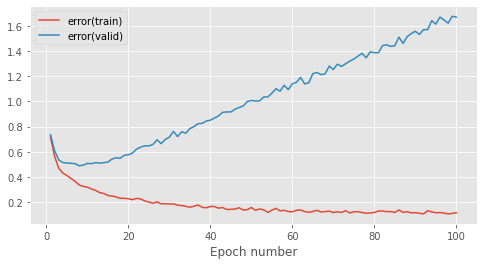

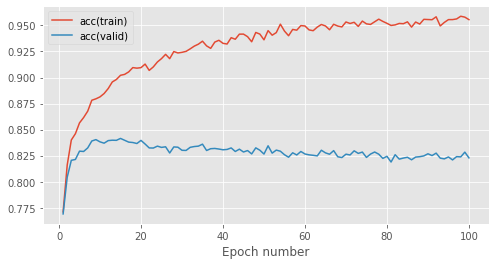

In [4]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

### add Dropout Layer


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 7.1s to complete
    error(train)=1.01e+00, acc(train)=7.00e-01, error(valid)=1.02e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 7.5s to complete
    error(train)=7.61e-01, acc(train)=7.67e-01, error(valid)=7.83e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 7.2s to complete
    error(train)=6.41e-01, acc(train)=7.97e-01, error(valid)=6.73e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 7.3s to complete
    error(train)=5.85e-01, acc(train)=8.12e-01, error(valid)=6.24e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 7.2s to complete
    error(train)=5.36e-01, acc(train)=8.25e-01, error(valid)=5.85e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 7.1s to complete
    error(train)=5.11e-01, acc(train)=8.32e-01, error(valid)=5.75e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 7.4s to complete
    error(train)=4.76e-01, acc(train)=8.41e-01, error(valid)=5.42e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 7.4s to complete
    error(train)=4.51e-01, acc(train)=8.49e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 7.6s to complete
    error(train)=4.44e-01, acc(train)=8.50e-01, error(valid)=5.34e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 7.3s to complete
    error(train)=4.14e-01, acc(train)=8.58e-01, error(valid)=5.09e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 7.6s to complete
    error(train)=3.98e-01, acc(train)=8.63e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 7.4s to complete
    error(train)=3.87e-01, acc(train)=8.65e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 7.4s to complete
    error(train)=3.64e-01, acc(train)=8.72e-01, error(valid)=4.87e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 7.1s to complete
    error(train)=3.56e-01, acc(train)=8.74e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 7.4s to complete
    error(train)=3.46e-01, acc(train)=8.77e-01, error(valid)=4.87e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 7.5s to complete
    error(train)=3.40e-01, acc(train)=8.78e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.3s to complete
    error(train)=3.29e-01, acc(train)=8.81e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.9s to complete
    error(train)=3.16e-01, acc(train)=8.86e-01, error(valid)=4.88e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.2s to complete
    error(train)=3.10e-01, acc(train)=8.87e-01, error(valid)=4.89e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.6s to complete
    error(train)=3.08e-01, acc(train)=8.88e-01, error(valid)=4.92e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.8s to complete
    error(train)=3.06e-01, acc(train)=8.86e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 7.4s to complete
    error(train)=2.97e-01, acc(train)=8.89e-01, error(valid)=5.04e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.4s to complete
    error(train)=2.82e-01, acc(train)=8.95e-01, error(valid)=4.98e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 7.5s to complete
    error(train)=2.79e-01, acc(train)=8.97e-01, error(valid)=4.99e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.7s to complete
    error(train)=2.68e-01, acc(train)=9.01e-01, error(valid)=5.02e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 7.7s to complete
    error(train)=2.60e-01, acc(train)=9.03e-01, error(valid)=5.08e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.0s to complete
    error(train)=2.67e-01, acc(train)=9.00e-01, error(valid)=5.16e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 7.2s to complete
    error(train)=2.56e-01, acc(train)=9.02e-01, error(valid)=5.14e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.5s to complete
    error(train)=2.52e-01, acc(train)=9.04e-01, error(valid)=5.20e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.3s to complete
    error(train)=2.43e-01, acc(train)=9.07e-01, error(valid)=5.24e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.6s to complete
    error(train)=2.35e-01, acc(train)=9.11e-01, error(valid)=5.23e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.5s to complete
    error(train)=2.27e-01, acc(train)=9.12e-01, error(valid)=5.37e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.6s to complete
    error(train)=2.30e-01, acc(train)=9.11e-01, error(valid)=5.43e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.8s to complete
    error(train)=2.27e-01, acc(train)=9.11e-01, error(valid)=5.51e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.6s to complete
    error(train)=2.30e-01, acc(train)=9.11e-01, error(valid)=5.62e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.6s to complete
    error(train)=2.14e-01, acc(train)=9.18e-01, error(valid)=5.50e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.2s to complete
    error(train)=2.12e-01, acc(train)=9.17e-01, error(valid)=5.69e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 7.6s to complete
    error(train)=2.08e-01, acc(train)=9.18e-01, error(valid)=5.74e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.8s to complete
    error(train)=2.05e-01, acc(train)=9.21e-01, error(valid)=5.71e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.7s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=5.96e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.2s to complete
    error(train)=1.92e-01, acc(train)=9.24e-01, error(valid)=5.96e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.4s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=6.17e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 7.4s to complete
    error(train)=1.98e-01, acc(train)=9.19e-01, error(valid)=6.27e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.9s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=6.49e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.4s to complete
    error(train)=1.88e-01, acc(train)=9.25e-01, error(valid)=6.27e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 7.3s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=6.38e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.6s to complete
    error(train)=1.74e-01, acc(train)=9.30e-01, error(valid)=6.39e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.4s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=6.68e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.4s to complete
    error(train)=1.69e-01, acc(train)=9.33e-01, error(valid)=6.69e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 7.2s to complete
    error(train)=1.67e-01, acc(train)=9.33e-01, error(valid)=6.78e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 7.2s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=7.09e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 7.2s to complete
    error(train)=1.62e-01, acc(train)=9.35e-01, error(valid)=6.90e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.5s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=7.03e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 7.4s to complete
    error(train)=1.70e-01, acc(train)=9.30e-01, error(valid)=7.23e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 7.2s to complete
    error(train)=1.58e-01, acc(train)=9.36e-01, error(valid)=7.21e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.6s to complete
    error(train)=1.56e-01, acc(train)=9.37e-01, error(valid)=7.28e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 7.5s to complete
    error(train)=1.58e-01, acc(train)=9.35e-01, error(valid)=7.51e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.4s to complete
    error(train)=1.58e-01, acc(train)=9.36e-01, error(valid)=7.48e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.6s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=7.64e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 7.3s to complete
    error(train)=1.42e-01, acc(train)=9.43e-01, error(valid)=7.56e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.5s to complete
    error(train)=1.44e-01, acc(train)=9.40e-01, error(valid)=7.97e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 7.4s to complete
    error(train)=1.53e-01, acc(train)=9.38e-01, error(valid)=8.09e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 7.5s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=8.04e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.2s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=8.14e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.1s to complete
    error(train)=1.38e-01, acc(train)=9.44e-01, error(valid)=8.21e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.2s to complete
    error(train)=1.35e-01, acc(train)=9.44e-01, error(valid)=8.28e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 7.0s to complete
    error(train)=1.36e-01, acc(train)=9.45e-01, error(valid)=8.26e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 7.0s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=8.94e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 6.9s to complete
    error(train)=1.37e-01, acc(train)=9.44e-01, error(valid)=8.82e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.9s to complete
    error(train)=1.29e-01, acc(train)=9.47e-01, error(valid)=8.67e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.9s to complete
    error(train)=1.38e-01, acc(train)=9.42e-01, error(valid)=9.08e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.9s to complete
    error(train)=1.30e-01, acc(train)=9.47e-01, error(valid)=8.97e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.9s to complete
    error(train)=1.26e-01, acc(train)=9.48e-01, error(valid)=8.99e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.9s to complete
    error(train)=1.27e-01, acc(train)=9.47e-01, error(valid)=9.20e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.9s to complete
    error(train)=1.26e-01, acc(train)=9.48e-01, error(valid)=9.18e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.0s to complete
    error(train)=1.24e-01, acc(train)=9.49e-01, error(valid)=9.52e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 7.0s to complete
    error(train)=1.28e-01, acc(train)=9.47e-01, error(valid)=9.50e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.9s to complete
    error(train)=1.20e-01, acc(train)=9.50e-01, error(valid)=9.56e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.0s to complete
    error(train)=1.22e-01, acc(train)=9.49e-01, error(valid)=9.65e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.0s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=9.61e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.1s to complete
    error(train)=1.21e-01, acc(train)=9.49e-01, error(valid)=1.00e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 7.2s to complete
    error(train)=1.20e-01, acc(train)=9.50e-01, error(valid)=1.02e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 7.0s to complete
    error(train)=1.14e-01, acc(train)=9.53e-01, error(valid)=1.02e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.1s to complete
    error(train)=1.09e-01, acc(train)=9.54e-01, error(valid)=1.03e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.0s to complete
    error(train)=1.21e-01, acc(train)=9.49e-01, error(valid)=1.05e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.0s to complete
    error(train)=1.06e-01, acc(train)=9.56e-01, error(valid)=1.05e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.8s to complete
    error(train)=1.07e-01, acc(train)=9.55e-01, error(valid)=1.05e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.2s to complete
    error(train)=1.06e-01, acc(train)=9.56e-01, error(valid)=1.08e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.2s to complete
    error(train)=1.22e-01, acc(train)=9.49e-01, error(valid)=1.10e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.2s to complete
    error(train)=1.15e-01, acc(train)=9.52e-01, error(valid)=1.11e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.1s to complete
    error(train)=1.19e-01, acc(train)=9.50e-01, error(valid)=1.13e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.2s to complete
    error(train)=1.02e-01, acc(train)=9.58e-01, error(valid)=1.12e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.2s to complete
    error(train)=1.07e-01, acc(train)=9.55e-01, error(valid)=1.12e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 7.2s to complete
    error(train)=1.06e-01, acc(train)=9.56e-01, error(valid)=1.12e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.2s to complete
    error(train)=1.07e-01, acc(train)=9.56e-01, error(valid)=1.13e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.2s to complete
    error(train)=9.33e-02, acc(train)=9.61e-01, error(valid)=1.15e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.2s to complete
    error(train)=9.80e-02, acc(train)=9.59e-01, error(valid)=1.16e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.2s to complete
    error(train)=9.63e-02, acc(train)=9.60e-01, error(valid)=1.17e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 7.2s to complete
    error(train)=1.13e-01, acc(train)=9.53e-01, error(valid)=1.21e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.3s to complete
    error(train)=1.14e-01, acc(train)=9.53e-01, error(valid)=1.22e+00, acc(valid)=8.20e-01


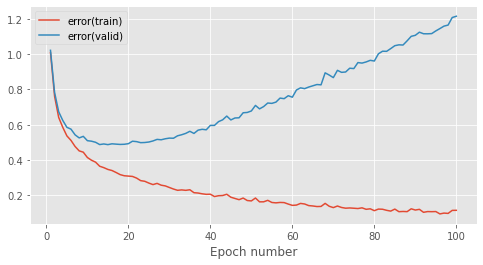

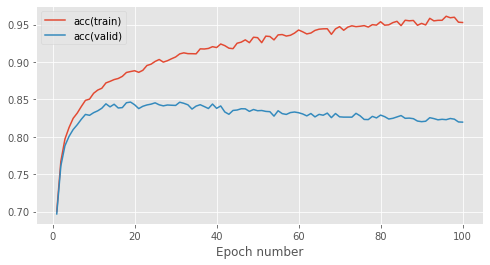

In [13]:
# dropout incl_prob = [0.1, 0.3, 0.5, 0.7, 0.9]

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.layers import DropoutLayer

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
test_incl_probs = [0.1, 0.3, 0.5, 0.7, 0.9]

for incl_prob in test_incl_probs:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        DropoutLayer(rng, incl_prob),
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng, incl_prob),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng, incl_prob),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng, incl_prob),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule()

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    print('-' * 80)
    print('Dropout hyperparameter value:{0}'.format(incl_prob))
    print('-' * 80)
    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

In [14]:
print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

    final error(train) = 1.14e-01
    final error(valid) = 1.22e+00
    final acc(train)   = 9.53e-01
    final acc(valid)   = 8.20e-01
    run time per epoch = 9.95


In [ ]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.layers import DropoutLayer

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
test_incl_probs = [0.1, 0.3, 0.5, 0.7, 0.9]

dropout_acc = []
dropout_gap = []
for incl_prob in test_incl_probs:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        DropoutLayer(rng, incl_prob),
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng, incl_prob),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng, incl_prob),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng, incl_prob),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule()

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    print('-' * 80)
    print('Dropout hyperparameter value:{0}'.format(incl_prob))
    print('-' * 80)
    dropout_acc.append(stats[-1, keys['acc(valid)']])
    dropout_gap.append(stats[-1, keys['error(valid)']])
    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))